<a href="https://colab.research.google.com/github/everson-silva/fundamentosPython/blob/main/ciencia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Conhecendo o Dataset

In [ ]:
df = pd.read_csv('train.csv', index_col='id')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16370 entries, 0 to 16369
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16370 non-null  int64  
 1   job             16242 non-null  object 
 2   marital         16339 non-null  object 
 3   education       15664 non-null  object 
 4   default         12885 non-null  object 
 5   housing         15967 non-null  object 
 6   loan            15967 non-null  object 
 7   contact         16370 non-null  object 
 8   month           16370 non-null  object 
 9   day_of_week     16370 non-null  object 
 10  duration        16370 non-null  int64  
 11  campaign        16370 non-null  int64  
 12  pdays           16370 non-null  int64  
 13  previous        16370 non-null  int64  
 14  poutcome        16370 non-null  object 
 15  emp.var.rate    16369 non-null  float64
 16  cons.price.idx  16369 non-null  float64
 17  cons.conf.idx   16369 non-null 

In [ ]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,16242,16339,15664,12885,15967,15967,16370,16370,16370,16370,16369
unique,11,3,7,2,2,2,2,10,5,4,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,4187,9861,4875,12884,8594,13491,10408,5498,3445,14125,14541


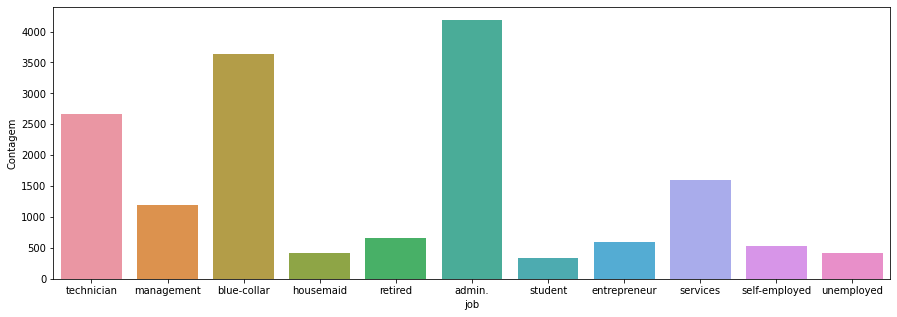

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='job', hue='education')
plt.ylabel('Contagem')
plt.show()

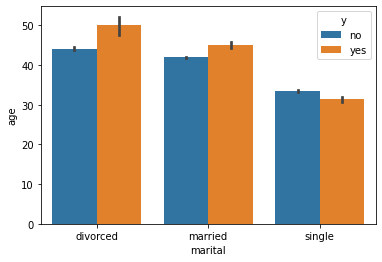

In [ ]:
sns.barplot(data=df, x='marital', y='age', hue='y')
plt.show()

In [ ]:
sns.catplot(data=df, x='marital', y='age', hue='y')
plt.show()

In [ ]:
sns.figsize=(15, 5) 
sns.catplot(data=df, x='job', y='duration', hue='y', kind='box', aspect=8/6, height=8);

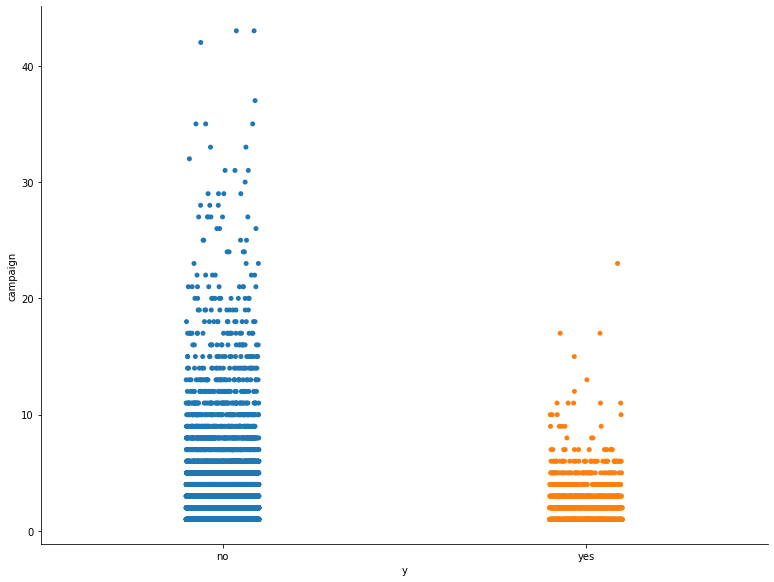

In [ ]:
sns.figsize=(15, 5) 
sns.catplot(data=df, x='y', y='campaign', aspect=8/6, height=8);

In [ ]:
df[df.y == 'yes'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,40.675602,548.304158,2.035011,782.256565,0.506018,-1.242505,93.361049,-39.826039,2.108350,5093.951805
std,13.695864,401.071280,1.669088,410.296967,0.866241,1.598187,0.676359,6.056280,1.727924,87.173584
min,18.000000,63.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,247.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.859000,5017.500000
50%,37.000000,445.500000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.300000,1.266000,5099.100000
75%,49.000000,732.250000,2.000000,999.000000,1.000000,-0.100000,93.994000,-36.100000,4.153000,5191.000000
max,92.000000,3643.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


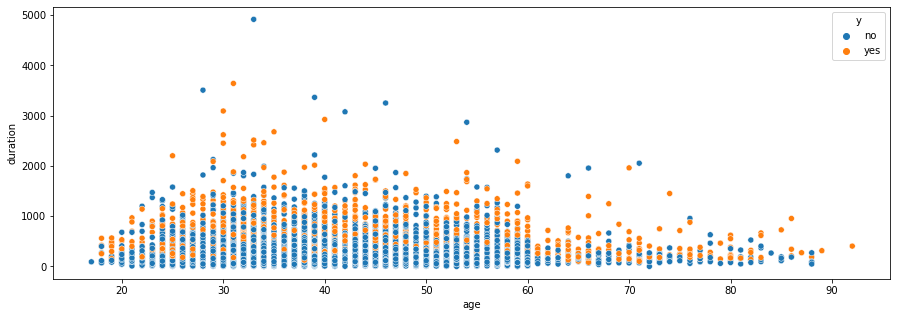

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='age', y='duration', data=df, hue='y')
plt.show()

# Modelando

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn import metrics

In [ ]:
# codificaçãão One-hot (mas não  vamos usar no modelo)
pd.get_dummies(df, columns=['job'])

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,52,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no,0,0,0,0,0,0,0,0,0,1,0
1,36,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,0,0,0,0,1,0,0,0,0,0,0
2,53,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,1,0,0,0,0,0,0,0,0,0
3,45,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no,0,1,0,0,0,0,0,0,0,0,0
4,60,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16365,48,married,basic.9y,no,yes,no,cellular,aug,mon,597,2,999,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no,0,1,0,0,0,0,0,0,0,0,0
16366,36,married,basic.6y,NaN,yes,no,cellular,jul,mon,214,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,0,1,0,0,0,0,0,0,0,0,0
16367,33,single,professional.course,no,yes,no,cellular,may,fri,70,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Transforma as categorias em números
for c in df.columns[df.dtypes == object]: # df.dtypes == 'object'
    df[c] = df[c].astype('category')

In [ ]:
df.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
       'professional.course', 'university.degree'], ordered=True, inplace=True)

id
0        professional.course
1          university.degree
2                high.school
3                   basic.9y
4                high.school
                ...         
37064            high.school
37065    professional.course
37066               basic.9y
37067      university.degree
37068      university.degree
Name: education, Length: 37069, dtype: category
Categories (7, object): ['illiterate' < 'basic.4y' < 'basic.6y' < 'basic.9y' < 'high.school' <
                         'professional.course' < 'university.degree']

In [ ]:
#Transforma as categorias em números
for c in df.columns[df.dtypes == 'category']: # df.dtypes == 'object'
    df[c] = df[c].cat.codes

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [ ]:
y = df.y
X = df.drop('y', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((31508, 20), (5561, 20), (31508,), (5561,))

In [ ]:
# vericando a divisão
sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.11266979814650248, 0.11256968171192232)

In [ ]:
# Normalizar os dados
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [ ]:
df_norm = pd.DataFrame(X_norm, columns=df.columns.drop('y'))

In [ ]:
df_norm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.432099,0.909091,0.333333,0.857143,0.0,1.0,0.5,1.0,0.444444,0.25,0.011387,0.127273,1.000000,0.000000,0.5,1.000000,0.882307,0.376569,0.959193,1.000000
1,0.234568,0.454545,0.666667,1.000000,0.5,1.0,0.5,0.0,0.777778,0.75,0.054290,0.018182,1.000000,0.000000,0.5,0.687500,0.389322,0.368201,0.797778,0.877883
2,0.444444,0.181818,0.666667,0.714286,0.5,1.0,1.0,0.0,0.333333,0.25,0.049410,0.018182,1.000000,0.000000,0.5,1.000000,0.669135,0.338912,0.981183,1.000000
3,0.345679,0.181818,1.000000,0.571429,0.5,1.0,0.5,0.0,0.111111,1.00,0.050630,0.000000,0.004004,0.142857,1.0,0.104167,0.000000,0.811715,0.055543,0.425709
4,0.530864,0.363636,0.666667,0.714286,0.0,1.0,0.5,1.0,0.666667,1.00,0.015047,0.000000,1.000000,0.000000,0.5,0.937500,0.698753,0.602510,0.957606,0.859735


In [ ]:
knn_class = KNeighborsClassifier()
knn_class.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_class.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4935
           1       0.59      0.52      0.55       626

    accuracy                           0.90      5561
   macro avg       0.76      0.73      0.75      5561
weighted avg       0.90      0.90      0.90      5561



# Submetendo pro Kaggle

In [ ]:
aval = pd.read_csv('test.csv', index_col='id')
sub =  pd.read_csv('sample.csv', index_col='id')

In [ ]:
for c in aval.columns[aval.dtypes == object]: # df.dtypes == 'object'
    aval[c] = aval[c].astype('category')

In [ ]:
aval.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
       'professional.course', 'university.degree'], ordered=True, inplace=True)

In [ ]:
#Transforma as categorias em números
for c in aval.columns[aval.dtypes == 'category']: # df.dtypes == 'object'
    aval[c] = aval[c].cat.codes

In [ ]:
aval.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
id,,,,,,,,,,,,,,,,,,,,
0,49,1,1,1,-1,0,0,1,4,0,115,1,999,0,1,1.4,94.465,-41.8,4.959,5228.1
1,23,8,2,4,0,1,0,0,0,1,637,1,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
2,42,9,1,5,0,0,0,0,1,2,295,1,6,2,2,-1.7,94.027,-38.3,0.899,4991.6
3,51,1,1,3,-1,0,1,0,6,4,22,2,999,0,1,-1.8,92.893,-46.2,1.334,5099.1
4,32,9,1,4,0,0,0,0,9,2,245,1,999,0,1,-1.1,94.199,-37.5,0.878,4963.6


In [ ]:
X_aval = scaler.fit_transform(aval.values)

In [ ]:
aval_norm = pd.DataFrame(X_aval, columns=aval.columns)

In [ ]:
aval_norm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.3875,0.181818,0.666667,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.041651,0.000,1.000000,0.0,0.5,1.000000,0.882307,0.376569,0.990607,1.000000
1,0.0625,0.818182,1.000000,0.714286,1.0,1.0,0.5,0.0,0.000000,0.25,0.235775,0.000,1.000000,0.0,0.5,0.333333,0.340608,0.154812,0.176403,0.512287
2,0.3000,0.909091,0.666667,0.857143,1.0,0.5,0.5,0.0,0.111111,0.50,0.108591,0.000,0.006006,0.4,1.0,0.354167,0.711613,0.523013,0.060481,0.105860
3,0.4125,0.181818,0.666667,0.571429,0.0,0.5,1.0,0.0,0.666667,1.00,0.007066,0.025,1.000000,0.0,0.5,0.333333,0.269680,0.192469,0.160137,0.512287
4,0.1750,0.909091,0.666667,0.714286,1.0,0.5,0.5,0.0,1.000000,0.50,0.089996,0.000,1.000000,0.0,0.5,0.479167,0.778644,0.556485,0.055670,0.000000


In [ ]:
y_aval = knn_class.predict(X_aval)

In [ ]:
sub.y = pd.Series(y_aval)

In [ ]:
sub.head()

,y
id,
0,0
1,0
2,0
3,0
4,0


In [ ]:
sub.to_csv('submission.csv')

# Random Forest

In [ ]:
#Visualização do conjunto de treino
X.head()

In [ ]:
#pipeline para realizar os k-folds no conjunto de treino
pipeline = make_pipeline(StandardScaler(), 
                         RandomForestClassifier(n_estimators=200))
#grid de Hiperparâmetros para serem testados
hyperparameters = { 'randomforestclassifier__max_features' : ['auto', None, 'log2'],
                  'randomforestclassifier__max_depth': [None, 3, 1]}
# Grid para k-fold de 10 dobras
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

In [ ]:
%%time
#Ajusta o modelo aos dados de treino
model=clf.fit(X,y)

In [ ]:
p = model.predict(test)

In [ ]:
#vizualização dos dados a serem submetidos
#sample.y= p
#sample.to_csv("~/submission.csv",index=False)
#sample.head()

# Métricas de avaliação

In [ ]:
solution = pd.read_csv('solution.csv').y
naive = pd.read_csv('allzeros.csv').y
rf = pd.read_csv('random_forest.csv').y

In [ ]:
# F1 de cada categoria
metrics.f1_score(solution, naive, pos_label=0), metrics.f1_score(solution, naive, pos_label=1)

(0.9403138667352715, 0.0)

In [ ]:
metrics.f1_score(solution, naive, average=None)

array([0.94031387, 0.        ])

In [ ]:
metrics.f1_score(solution, naive, average='micro'), metrics.f1_score(solution, naive, average='macro')

(0.8873512988589464, 0.47015693336763575)

In [ ]:
metrics.accuracy_score(solution,naive)

0.8873512988589464

In [ ]:
metrics.precision_score(solution, naive, average=None), metrics.recall_score(solution, naive, average=None)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.8873513, 0.       ]), array([1., 0.]))

In [ ]:
metrics.precision_recall_fscore_support(solution, naive)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.8873513, 0.       ]),
 array([1., 0.]),
 array([0.94031387, 0.        ]),
 array([3655,  464]))

In [ ]:
print(metrics.classification_report(solution, rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3655
           1       0.70      0.52      0.59       464

    accuracy                           0.92      4119
   macro avg       0.82      0.74      0.77      4119
weighted avg       0.91      0.92      0.92      4119

